## **Sommaire**

1. [Importation des bibliothèques](#importation)
2. [Chargement des données](#chargement)
3. [EDA pour le dataset `general_data`](#eda_general_data)
    1. [Lecture du dataset](#3_lecture)
    2. [Analyse des données](#3_analyse)
    3. [Détection des valeurs manquantes](#3_manquantes)
    4. [Détection des valeurs dupliquées](#3_dupliquees)
    5. [Nettoyage des données](#3_nettoyage)
    6. [Sélection des colonnes pertinentes](#3_selection)
    7. [Analyse univariée](#3_univariee)
    8. [Analyse bivariée](#3_bivariee)



---

### 1. <a id='importation'>Importation des bibliothèques</a>

In [21]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
import time

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

DELIMITER = "--------------------------------"

---

### 2. <a id='chargement'>Chargement des données</a>

In [22]:
# Chargement des données
path = "../data/"
general_data = pd.read_csv(path + "general_data.csv")

---

### 3. <a id='eda_general_data'>EDA pour le dataset `general_data`</a>

#### 3.1. <a id='3_lecture'>Lecture du dataset</a>

In [23]:
# Affichage des 5 premières lignes du dataset
print(general_data.head())

print(DELIMITER)

# Affichage des 5 dernières lignes du dataset
print(general_data.tail())


   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0

#### 3.2. <a id='3_analyse'>Analyse des données</a>

In [24]:
# Informations de base
print("Informations de base :")
general_data.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(general_data.describe())

Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  N

#### 3.3. <a id='3_manquantes'>Détection des valeurs manquantes</a>


In [25]:
# Nombre de valeurs nulles par colonnes
print(general_data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


#### 3.4. <a id='3_dupliquees'>Détection des valeurs dupliquées</a>


In [26]:
print(f"Nombre de valeurs dupliquées : {general_data.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


##### **Résumé du dataset general_data**

**Structure générale**
- Nombre de lignes : 4410
- Nombre de colonnes : 24

‎ 

| #  | Colonne                     | Type      | Description                                    | Valeurs manquantes | Moyenne   | Médiane | Min | Max      |
|----|-----------------------------|-----------|-----------------------------------------------|--------------------|-----------|---------|-----|----------|
| 1  | Age                         | int64     | Âge des employés                              | 0                  | 36.92     | 36      | 18  | 60       |
| 2  | Attrition                   | object    | Indique si l'employé a quitté l'entreprise    | 0                  | -         | -       | -   | -        |
| 3  | BusinessTravel              | object    | Fréquence des déplacements professionnels     | 0                  | -         | -       | -   | -        |
| 4  | Department                  | object    | Département auquel l'employé appartient       | 0                  | -         | -       | -   | -        |
| 5  | DistanceFromHome            | int64     | Distance entre domicile et lieu de travail    | 0                  | 9.19      | 7       | 1   | 29       |
| 6  | Education                   | int64     | Niveau d'éducation (1 à 5)                    | 0                  | 2.91      | 3       | 1   | 5        |
| 7  | EducationField              | object    | Domaine d'étude                               | 0                  | -         | -       | -   | -        |
| 8  | EmployeeCount               | int64     | Toujours égal à 1                             | 0                  | 1.0       | 1       | 1   | 1        |
| 9  | EmployeeID                  | int64     | Identifiant unique pour chaque employé        | 0                  | -         | -       | 1   | 4410     |
| 10 | Gender                      | object    | Genre de l'employé                            | 0                  | -         | -       | -   | -        |
| 11 | JobLevel                    | int64     | Niveau de poste (1 à 5)                       | 0                  | 2.06      | 2       | 1   | 5        |
| 12 | JobRole                     | object    | Intitulé du poste                             | 0                  | -         | -       | -   | -        |
| 13 | MaritalStatus               | object    | État civil                                    | 0                  | -         | -       | -   | -        |
| 14 | MonthlyIncome               | int64     | Revenu mensuel (en dollars)                  | 0                  | 65,029    | 49,190  | 10,090 | 199,990 |
| 15 | NumCompaniesWorked          | float64   | Nombre d'entreprises où l'employé a travaillé| 19                 | 2.69      | 2       | 0   | 9        |
| 16 | Over18                      | object    | Toujours "Yes"                                | 0                  | -         | -       | -   | -        |
| 17 | PercentSalaryHike           | int64     | Augmentation de salaire en %                  | 0                  | 15.21     | 14      | 11  | 25       |
| 18 | StandardHours               | int64     | Toujours égal à 8                             | 0                  | 8.0       | 8       | 8   | 8        |
| 19 | StockOptionLevel            | int64     | Niveau d'options sur actions (0 à 3)         | 0                  | 0.79      | 1       | 0   | 3        |
| 20 | TotalWorkingYears           | float64   | Années totales d'expérience                  | 9                  | 11.28     | 10      | 0   | 40       |
| 21 | TrainingTimesLastYear       | int64     | Nombre de formations l'année précédente       | 0                  | 2.80      | 3       | 0   | 6        |
| 22 | YearsAtCompany              | int64     | Années passées dans l'entreprise              | 0                  | 7.01      | 5       | 0   | 40       |
| 23 | YearsSinceLastPromotion     | int64     | Années depuis la dernière promotion           | 0                  | 2.19      | 1       | 0   | 15       |
| 24 | YearsWithCurrManager        | int64     | Années passées avec le manager actuel         | 0                  | 4.12      | 3       | 0   | 17       |


‎

**Points notables**
- Aucune valeur en double n’est présente dans le dataset, ce qui évite les problématiques de déduplication.  
- Le nombre de valeurs manquantes est limité, avec moins de 0.5 % des données affectées (par exemple, 19 valeurs manquantes pour le nombre d’entreprises travaillées).  
- La majorité des colonnes numériques présentent des distributions équilibrées autour de leurs médianes (souvent proches des moyennes).  
- Les colonnes comme `StandardHours`, `EmployeeCount` et `Over18` ont des valeurs constantes, ce qui simplifie leur gestion dans l’analyse.

#### 3.5. <a id='3_nettoyage'>Nettoyage des données</a>

Pour gérer le cas des données manquantes dans le dataset general_data, nous allons les remplacer par la valeur médiane de chaque colonne numérique, et par la valeur la plus fréquente pour les colonnes catégoriques.


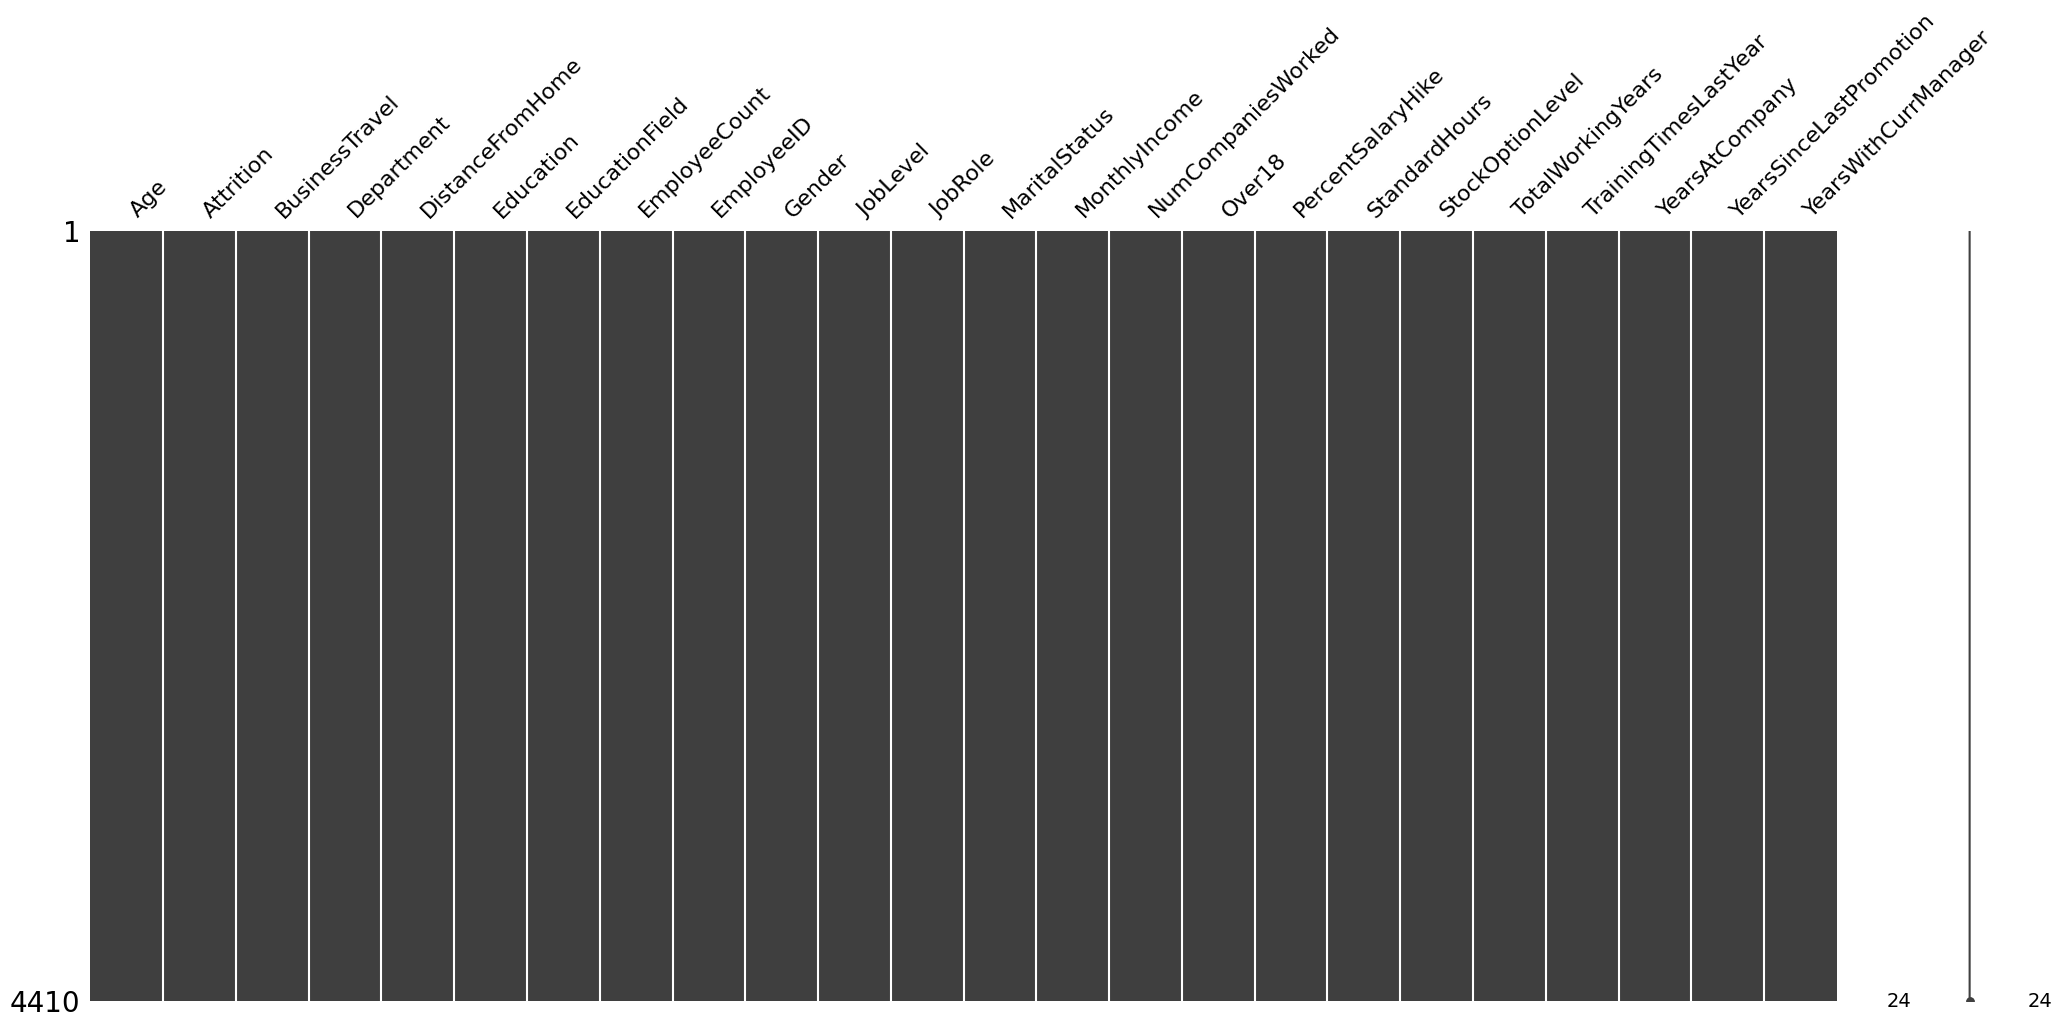

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64


In [28]:
# Visualisation des données manquantes
msno.matrix(general_data)
plt.show()

# Identification et gestion des colonnes numériques
numerical_columns = general_data.select_dtypes(include=['int64', 'float64']).columns
general_data[numerical_columns] = general_data[numerical_columns].fillna(general_data[numerical_columns].median())

# Identification et gestion des colonnes catégoriques
categorical_columns = general_data.select_dtypes(include=['object']).columns
general_data[categorical_columns] = general_data[categorical_columns].fillna(general_data[categorical_columns].mode().iloc[0])

# Affichage du nombre de données manquantes
print(general_data.isnull().sum())

#### 3.6. <a id='3_selection'>Sélection des colonnes pertinentes</a>

In [29]:
# Pour l'analyse des données, les colonnes suivantes seront retirées :
# - EmployeeID : Identifiant unique à chaque employé, purement descriptif
# - EmployeeCount : Toujours égal à 1
# - Over18 : Toujours "Yes"
# - StandardHours : Toujours égal à 8
numerical_columns = numerical_columns.drop(['EmployeeID', 'EmployeeCount', 'StandardHours'])
print(f"Colonnes numériques : {numerical_columns.tolist()}")

categorical_columns = categorical_columns.drop('Over18')
print(f"Colonnes catégoriques : {categorical_columns.tolist()}")

Colonnes numériques : ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Colonnes catégoriques : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


#### 3.7. <a id='3_univariee'>Analyse univariée</a>

3.7.1. Histogrammes

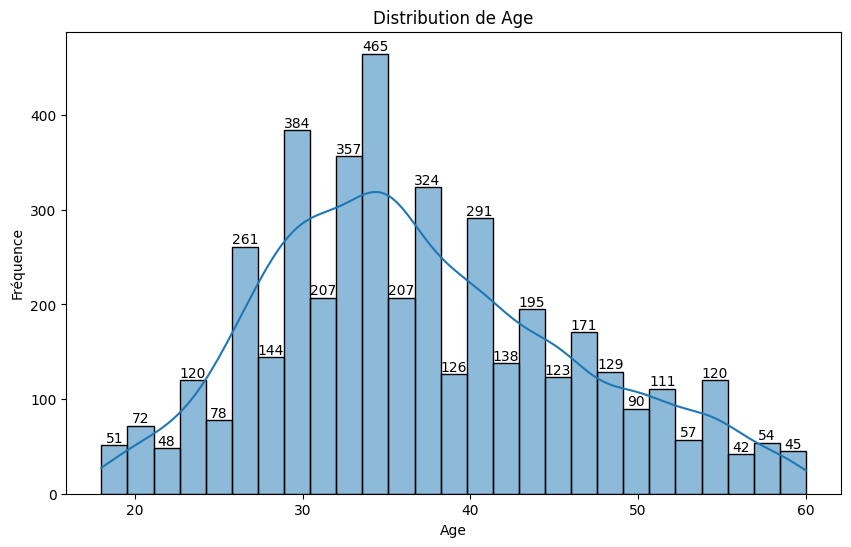

--------------------------------


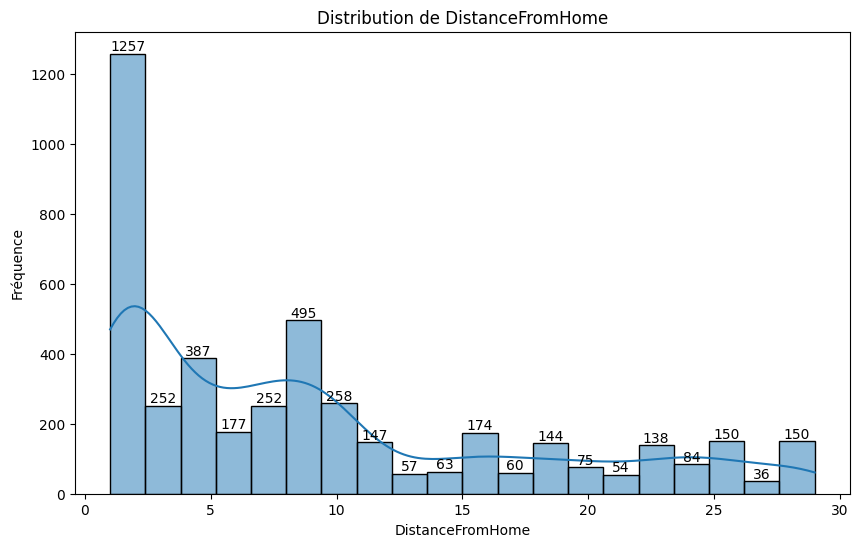

--------------------------------


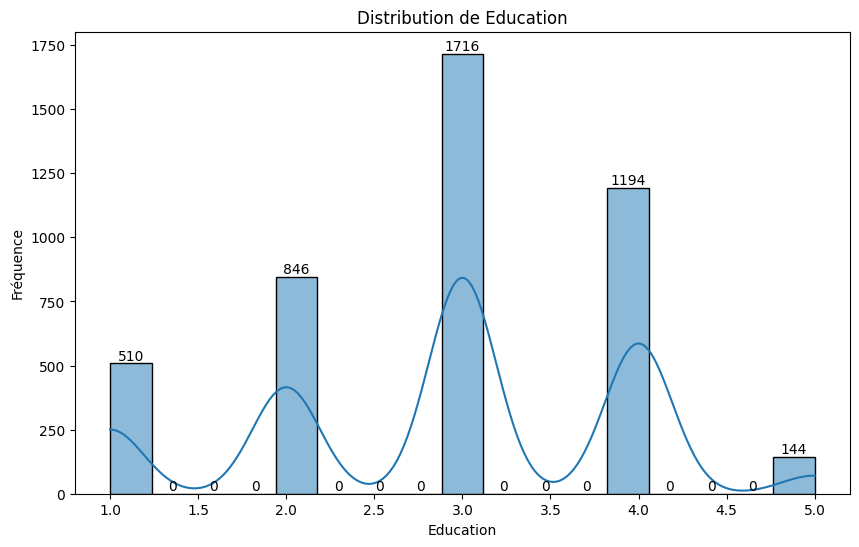

--------------------------------


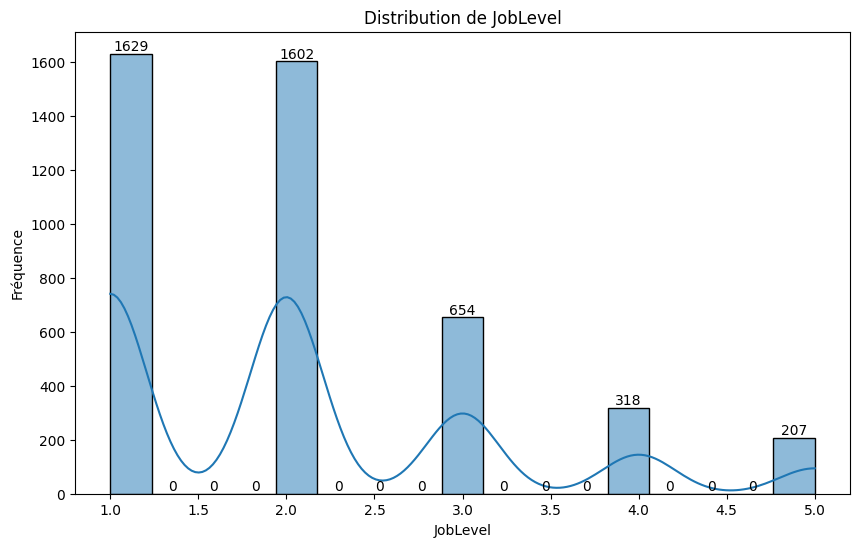

--------------------------------


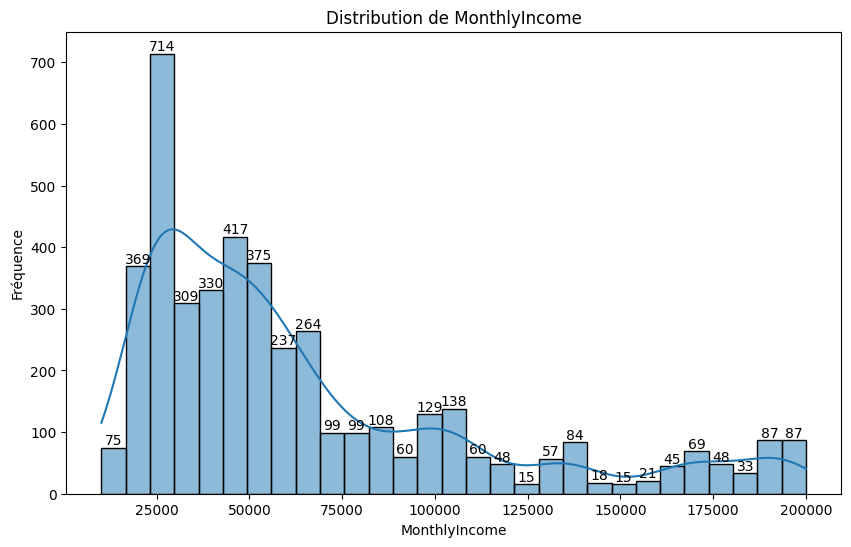

--------------------------------


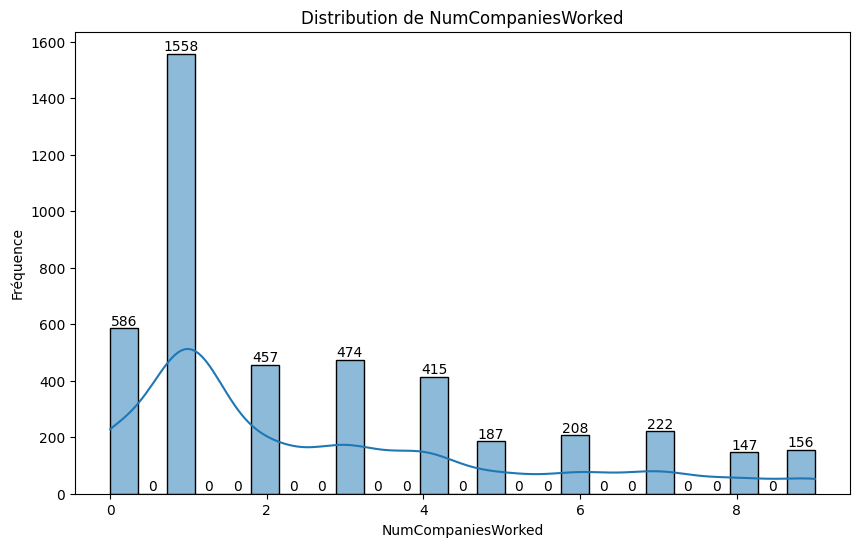

--------------------------------


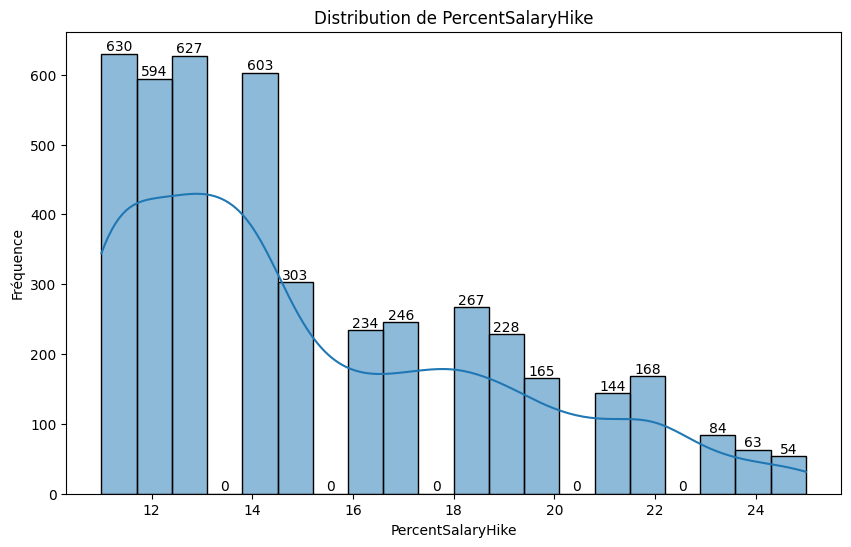

--------------------------------


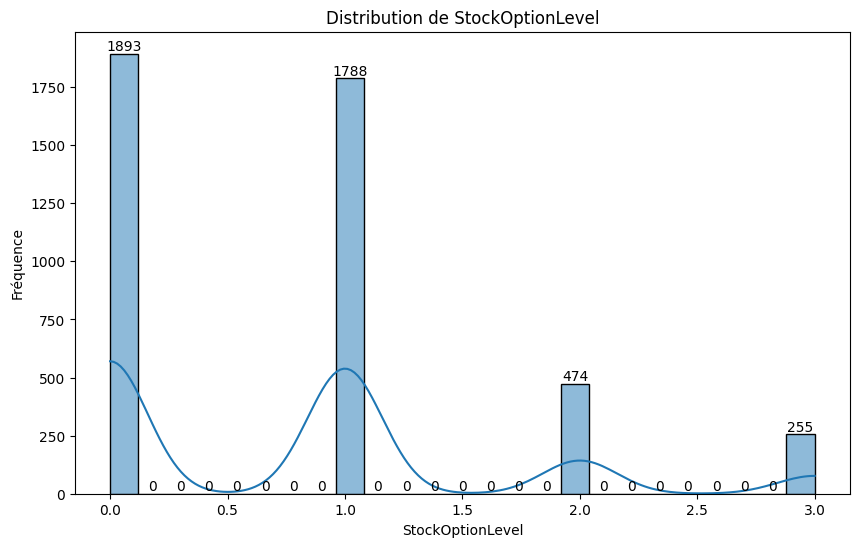

--------------------------------


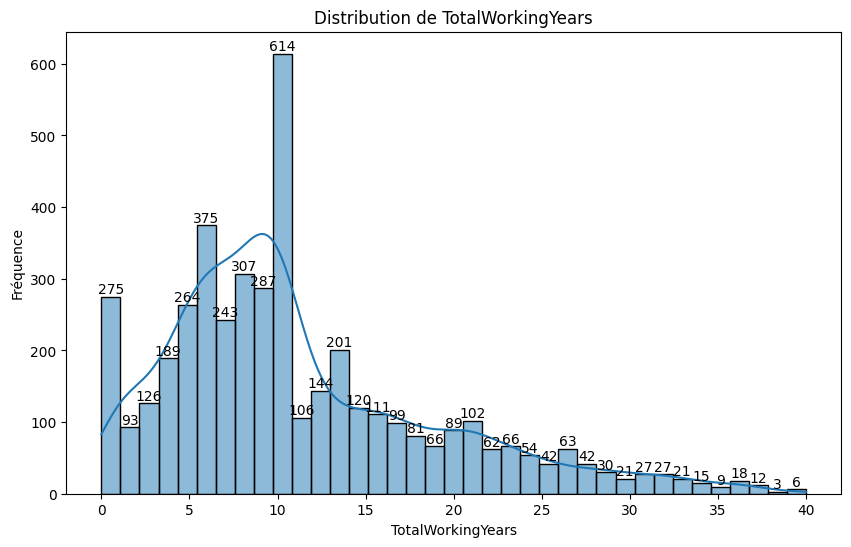

--------------------------------


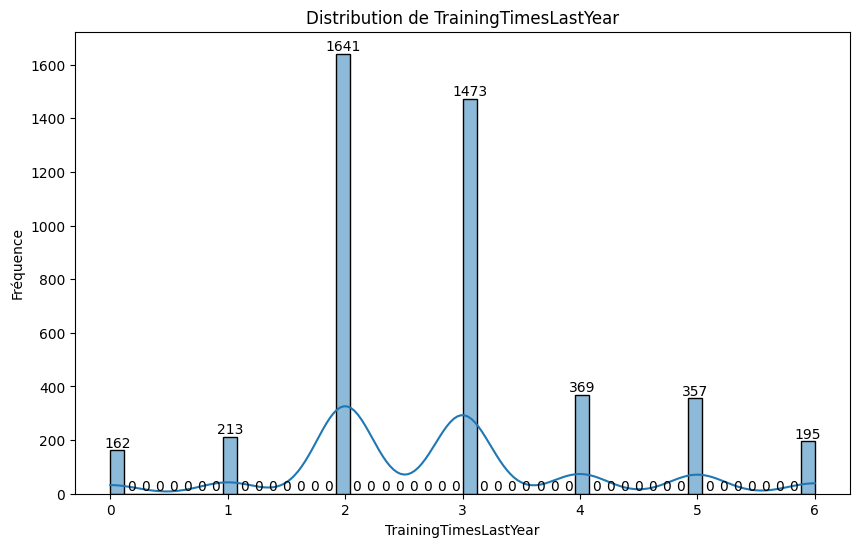

--------------------------------


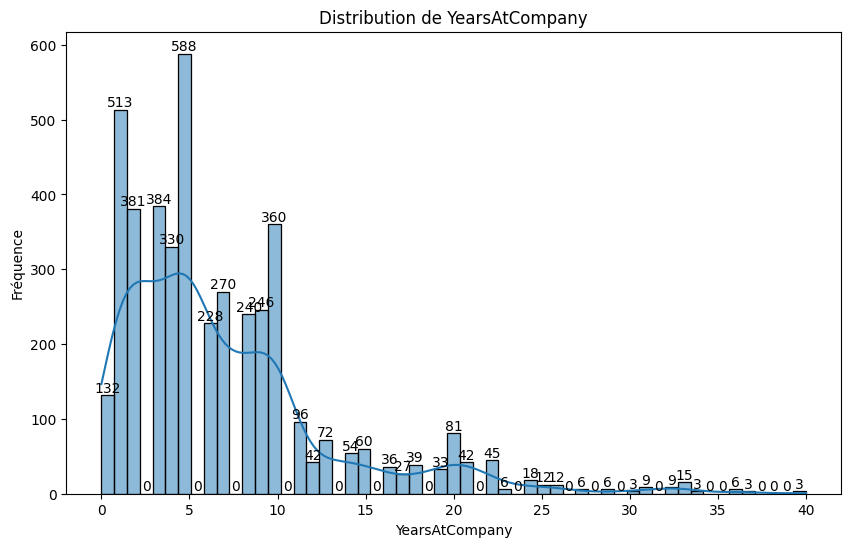

--------------------------------


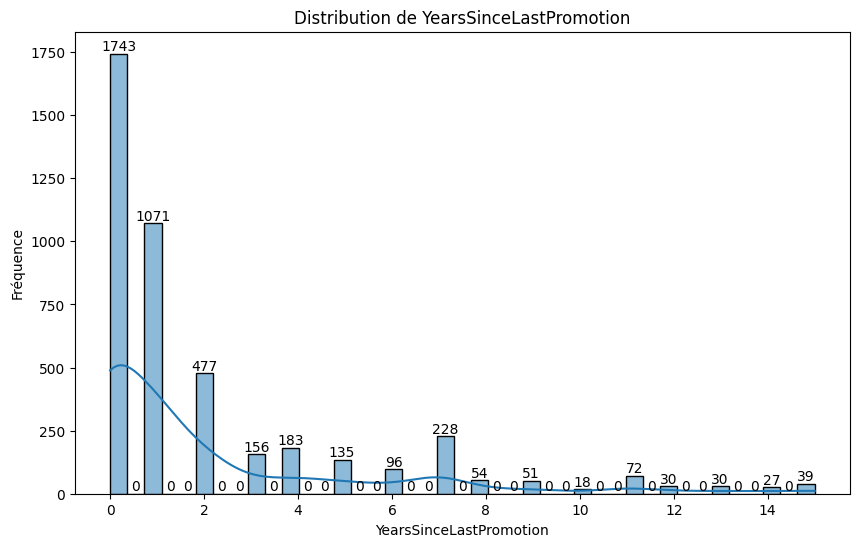

--------------------------------


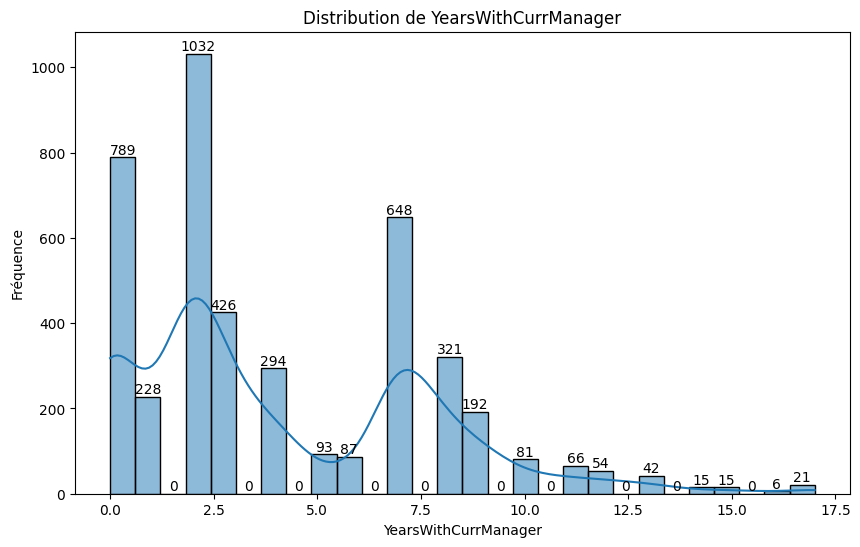

--------------------------------


In [30]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(general_data[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

**Observations**
- Distribution relativement uniforme pour `EnvironmentSatisfaction`et `JobSatisfaction`
- Distribution plus concentrée pour le métrique `WorkLifeBalance`
- Pics observés sur le niveau 3 pour les trois métriques
- Niveau 1 est le moins fréquent
- Les métriques montrent des tendances positives (médianes à 3 sur 4)
- Les valeurs en dehors des niveaux correspondent aux outliers qui ont été remplacés par la valeur moyenne

=======================================================================================================


3.7.2. Boxplots

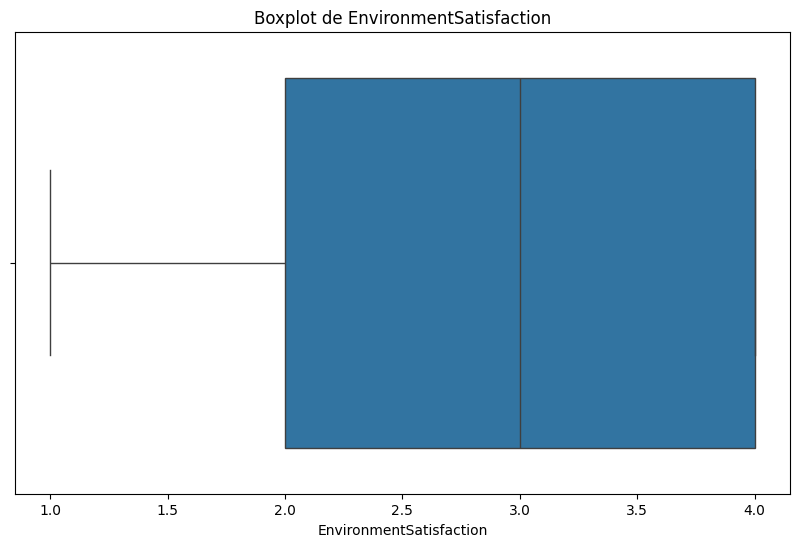

--------------------------------


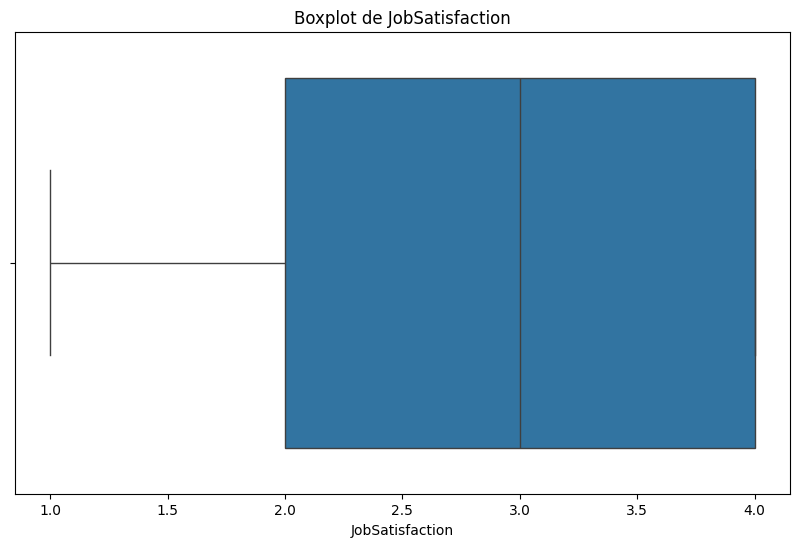

--------------------------------


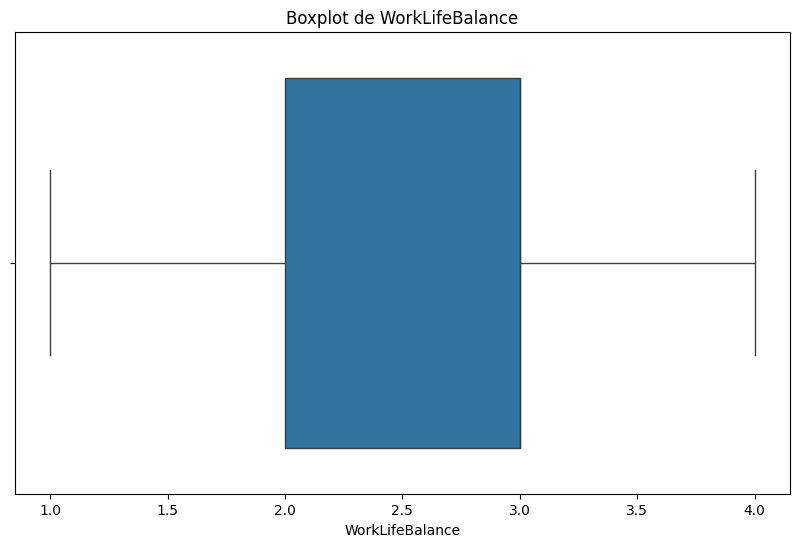

--------------------------------


In [10]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=general_data)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

**Observations**
- Les trois métriques montrent des tendances positives (médianes à 3 sur 4)
- `WorkLifeBalance` montre moins de variation que les autres métriques
- Absence d'outliers (valeurs aberrantes), ce qui suggère des données cohérentes
- Les distributions sont relativements symétriques

=======================================================================================================

#### <a id='3_bivariee'>3.8. Analyse bivariée</a>

3.8.1. Heatmaps

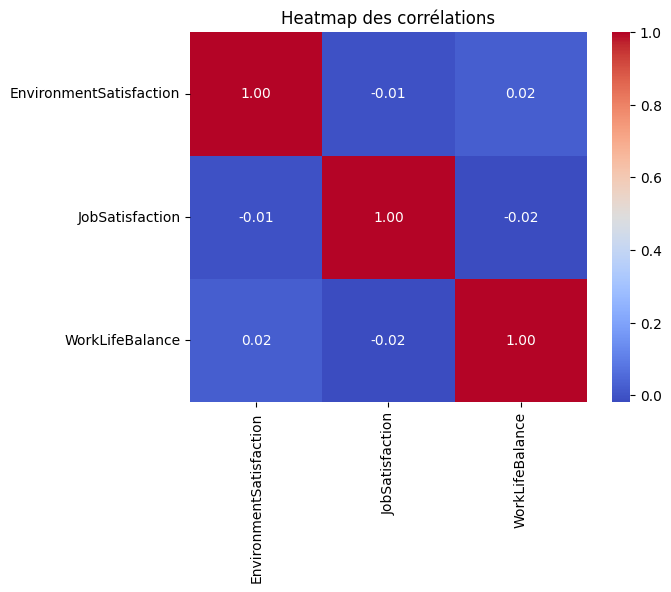

In [11]:
# Calcul de la matrice de corrélation
corr_matrix = general_data[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].corr()

# Création de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap des corrélations')
plt.show()

**Observations**
- `EnvironmentSatisfaction` vs `JobSatisfaction` -> Corrélation de -0.01 -> Pratiquement aucune relation
- `EnvironmentSatisfaction` vs `WorkLifeBalance` -> Corrélation de 0.02 -> Pas de relation significative
- `JobSatisfaction` vs `WorkLifeBalance` -> Corrélation de -0.01 -> Pas de relation non plus
- Aucune forte dépendance est observée entre ces métriques

=======================================================================================================

3.8.2. Scatterplots

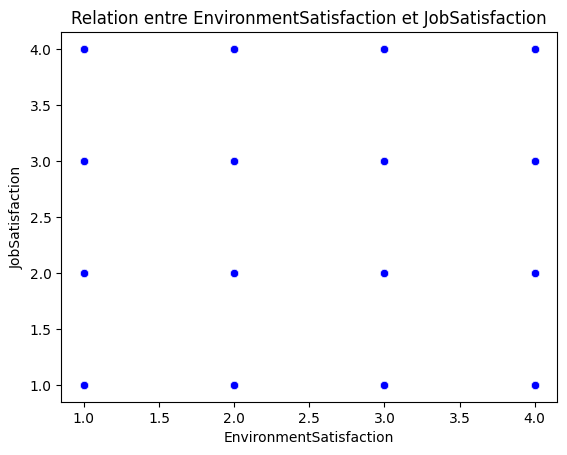

In [12]:
# Scatterplot EnvironmentSatisfaction - JobSatisfaction
sns.scatterplot(data=general_data, x='EnvironmentSatisfaction', y='JobSatisfaction', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et JobSatisfaction')
plt.show()

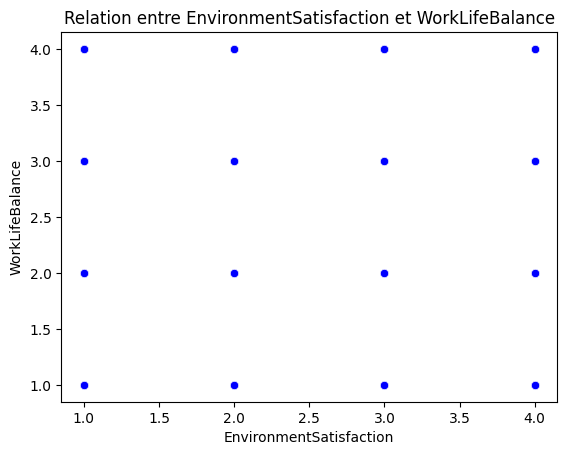

In [13]:
# Scatterplot EnvironmentSatisfaction - WorkLifeBalance
sns.scatterplot(data=general_data, x='EnvironmentSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre EnvironmentSatisfaction et WorkLifeBalance')
plt.show()

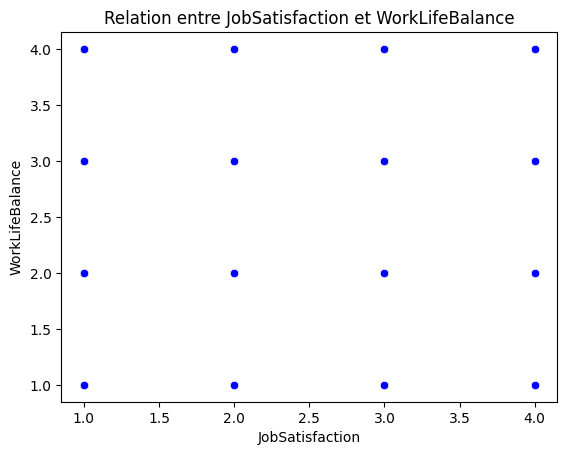

In [14]:
# Scatterplot JobSatisfaction - WorkLifeBalance
sns.scatterplot(data=general_data, x='JobSatisfaction', y='WorkLifeBalance', color='blue')
plt.title('Relation entre JobSatisfaction et WorkLifeBalance')
plt.show()

**Observations**
- D'après les graphiques ci-dessus, il semblerait qu'il y ait aucune relation entre les variables, donc qu'elles évoluent indépendamment.
- Une variation dans une variable n'entraînerait aucun changement chez une autre

=======================================================================================================

3.8.3. Diagrammes de densité bivarié (kdeplots)

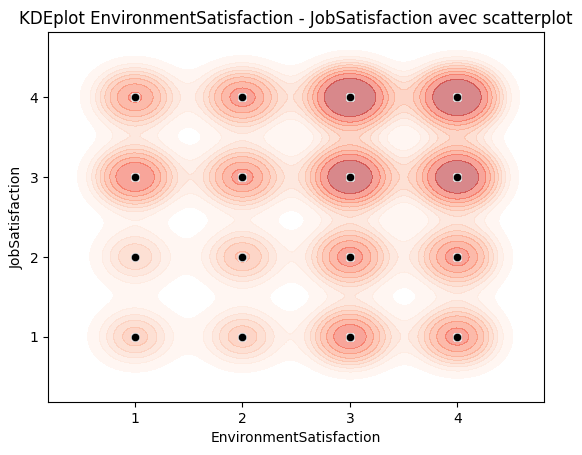

In [15]:
# Kdeplot EnvironmentSatisfaction - JobSatisfaction
sns.kdeplot(x=general_data['EnvironmentSatisfaction'], y=general_data['JobSatisfaction'], fill=True, cmap="Reds", alpha=0.5)

# Superposition avec un scatterplot pour plus de clarté
sns.scatterplot(x=general_data['EnvironmentSatisfaction'], y=general_data['JobSatisfaction'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - JobSatisfaction avec scatterplot")
plt.show()


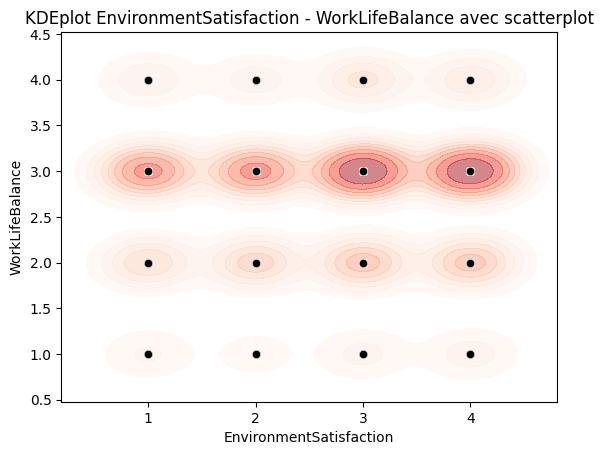

In [16]:
# KDEplot EnvironmentSatisfaction - WorkLifeBalance
sns.kdeplot(x=general_data['EnvironmentSatisfaction'], y=general_data['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=general_data['EnvironmentSatisfaction'], y=general_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot EnvironmentSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

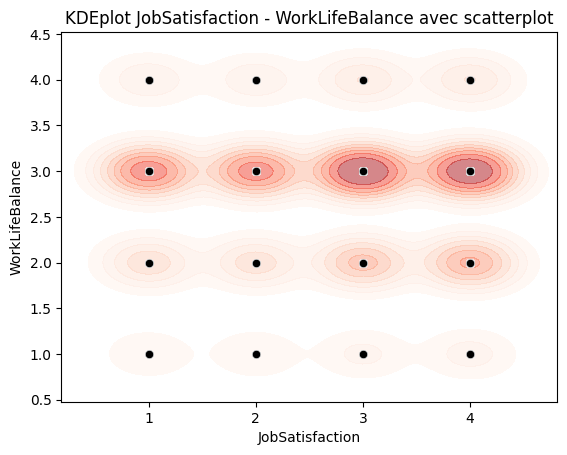

In [17]:
# KDEplot JobSatisfaction - WorkLifeBalance
sns.kdeplot(x=general_data['JobSatisfaction'], y=general_data['WorkLifeBalance'], fill=True, cmap="Reds", alpha=0.5)

sns.scatterplot(x=general_data['JobSatisfaction'], y=general_data['WorkLifeBalance'], color="black", alpha=0.7)

plt.title("KDEplot JobSatisfaction - WorkLifeBalance avec scatterplot")
plt.show()

**Observations**
- `EnvironmentSatisfaction` - `JobSatisfaction`
    - Les zones les plus denses se trouvent où `EnvironmentSatisfaction` = 3 ou 4 et `JobSatisfaction` = 3 ou 4, ce qui suggère qu'une majorité des employés sont satisfaits ou très satisfaits dans ces deux métriques
    - Les zones les moins denses se trouvent aux combinaisons faibles de satisfaction
    - Peut suggérer une corrélation potentielle entre les deux variables, mais cela a été refuté dans les étapes précédentes

- `EnvironmentSatisfaction` - `WorkLifeBalance`
    - La densité la plus élevée se trouve lorsque `EnvironmentSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui indique que la majorité des employés ayant une satisfaction environnementale élevée perçevoit leur équilibre vie privée et vie professionnelle comme "Très satisfaisant"
    - Les combinaisons faibles de satisfaction sont très peu fréquentes, à en juger par la densité minimale sur le graphique à ces points
- `JobSatisfaction` - `WorkLifeBalance`
    - Les densités les plus élevées se trouvent autour de `JobSatisfaction` = 3 ou 4 et `WorkLifeBalance` = 3, ce qui montre que la majorité des employés ayant une satisfaction professionnelle élevée perçoivent également leur équilibre travail-vie personnelle comme "Très satisfaisant".
    - Les zones avec `JobSatisfaction` = 1 ou 2 et `WorkLifeBalance` = 1 ou 2 montrent une faible densité, ce qui indique que peu d'employés combinent une faible satisfaction professionnelle avec un mauvais équilibre travail-vie personnelle.

--------